# GAN 훈련

## 라이브러리 임포트

In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari


Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## 데이터 적재

In [4]:
(x_train, y_train) = load_safari(DATA_NAME)

In [5]:
x_train.shape

(80000, 28, 28, 1)

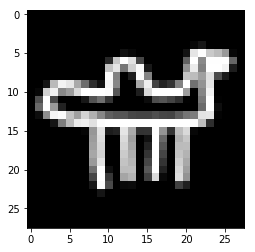

In [6]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## 모델 만들기

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [9]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       204928    
__________

## 모델 훈련

*에포크마다 생성된 샘플 이미지가 `run/gan/0001_camel/images` 폴더에 저장됩니다.*

In [10]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [11]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

Instructions for updating:
Use tf.cast instead.


/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.717)(R 0.698, F 0.735)] [D acc: (0.172)(0.344, 0.000)] [G loss: 0.685] [G acc: 1.000]
1 [D loss: (0.839)(R 0.640, F 1.039)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.674] [G acc: 1.000]
2 [D loss: (1.021)(R 0.634, F 1.408)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.686] [G acc: 1.000]
3 [D loss: (0.696)(R 0.686, F 0.707)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.686] [G acc: 1.000]
4 [D loss: (0.695)(R 0.687, F 0.703)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.687] [G acc: 1.000]
5 [D loss: (0.694)(R 0.688, F 0.701)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.688] [G acc: 1.000]
6 [D loss: (0.693)(R 0.688, F 0.699)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.687] [G acc: 1.000]
7 [D loss: (0.694)(R 0.687, F 0.700)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.688] [G acc: 1.000]
8 [D loss: (0.694)(R 0.687, F 0.701)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.688] [G acc: 1.000]
9 [D loss: (0.694)(R 0.688, F 0.701)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.689] [G acc: 1.000]


85 [D loss: (0.690)(R 0.684, F 0.697)] [D acc: (0.609)(0.891, 0.328)] [G loss: 0.704] [G acc: 0.109]
86 [D loss: (0.688)(R 0.680, F 0.696)] [D acc: (0.609)(0.766, 0.453)] [G loss: 0.710] [G acc: 0.000]
87 [D loss: (0.699)(R 0.675, F 0.723)] [D acc: (0.500)(0.828, 0.172)] [G loss: 0.699] [G acc: 0.297]
88 [D loss: (0.683)(R 0.680, F 0.686)] [D acc: (0.758)(0.734, 0.781)] [G loss: 0.714] [G acc: 0.125]
89 [D loss: (0.700)(R 0.663, F 0.738)] [D acc: (0.492)(0.875, 0.109)] [G loss: 0.718] [G acc: 0.047]
90 [D loss: (0.692)(R 0.678, F 0.706)] [D acc: (0.484)(0.688, 0.281)] [G loss: 0.704] [G acc: 0.188]
91 [D loss: (0.689)(R 0.674, F 0.705)] [D acc: (0.609)(0.828, 0.391)] [G loss: 0.703] [G acc: 0.344]
92 [D loss: (0.690)(R 0.672, F 0.709)] [D acc: (0.523)(0.781, 0.266)] [G loss: 0.711] [G acc: 0.078]
93 [D loss: (0.699)(R 0.680, F 0.717)] [D acc: (0.461)(0.766, 0.156)] [G loss: 0.698] [G acc: 0.328]
94 [D loss: (0.696)(R 0.677, F 0.715)] [D acc: (0.422)(0.766, 0.078)] [G loss: 0.695] [G ac

166 [D loss: (0.692)(R 0.682, F 0.701)] [D acc: (0.547)(0.781, 0.312)] [G loss: 0.693] [G acc: 0.484]
167 [D loss: (0.692)(R 0.682, F 0.702)] [D acc: (0.508)(0.766, 0.250)] [G loss: 0.694] [G acc: 0.391]
168 [D loss: (0.693)(R 0.681, F 0.705)] [D acc: (0.508)(0.797, 0.219)] [G loss: 0.690] [G acc: 0.594]
169 [D loss: (0.694)(R 0.682, F 0.705)] [D acc: (0.562)(0.859, 0.266)] [G loss: 0.695] [G acc: 0.344]
170 [D loss: (0.696)(R 0.689, F 0.703)] [D acc: (0.398)(0.609, 0.188)] [G loss: 0.692] [G acc: 0.594]
171 [D loss: (0.694)(R 0.681, F 0.706)] [D acc: (0.516)(0.812, 0.219)] [G loss: 0.693] [G acc: 0.422]
172 [D loss: (0.689)(R 0.683, F 0.696)] [D acc: (0.578)(0.797, 0.359)] [G loss: 0.696] [G acc: 0.359]
173 [D loss: (0.691)(R 0.682, F 0.699)] [D acc: (0.492)(0.672, 0.312)] [G loss: 0.695] [G acc: 0.438]
174 [D loss: (0.690)(R 0.681, F 0.698)] [D acc: (0.562)(0.781, 0.344)] [G loss: 0.700] [G acc: 0.250]
175 [D loss: (0.690)(R 0.679, F 0.702)] [D acc: (0.461)(0.625, 0.297)] [G loss: 0.

250 [D loss: (0.683)(R 0.630, F 0.735)] [D acc: (0.508)(0.719, 0.297)] [G loss: 0.699] [G acc: 0.406]
251 [D loss: (0.678)(R 0.640, F 0.716)] [D acc: (0.539)(0.672, 0.406)] [G loss: 0.690] [G acc: 0.469]
252 [D loss: (0.687)(R 0.611, F 0.763)] [D acc: (0.578)(0.844, 0.312)] [G loss: 0.704] [G acc: 0.406]
253 [D loss: (0.687)(R 0.619, F 0.755)] [D acc: (0.500)(0.781, 0.219)] [G loss: 0.709] [G acc: 0.406]
254 [D loss: (0.693)(R 0.645, F 0.742)] [D acc: (0.500)(0.703, 0.297)] [G loss: 0.695] [G acc: 0.422]
255 [D loss: (0.684)(R 0.627, F 0.742)] [D acc: (0.594)(0.812, 0.375)] [G loss: 0.711] [G acc: 0.328]
256 [D loss: (0.681)(R 0.633, F 0.728)] [D acc: (0.500)(0.656, 0.344)] [G loss: 0.704] [G acc: 0.391]
257 [D loss: (0.677)(R 0.632, F 0.722)] [D acc: (0.570)(0.750, 0.391)] [G loss: 0.680] [G acc: 0.609]
258 [D loss: (0.677)(R 0.613, F 0.742)] [D acc: (0.586)(0.797, 0.375)] [G loss: 0.709] [G acc: 0.391]
259 [D loss: (0.673)(R 0.624, F 0.723)] [D acc: (0.531)(0.703, 0.359)] [G loss: 0.

331 [D loss: (0.672)(R 0.631, F 0.714)] [D acc: (0.594)(0.656, 0.531)] [G loss: 0.760] [G acc: 0.234]
332 [D loss: (0.666)(R 0.584, F 0.748)] [D acc: (0.602)(0.797, 0.406)] [G loss: 0.740] [G acc: 0.344]
333 [D loss: (0.642)(R 0.580, F 0.705)] [D acc: (0.641)(0.672, 0.609)] [G loss: 0.754] [G acc: 0.250]
334 [D loss: (0.683)(R 0.585, F 0.782)] [D acc: (0.547)(0.672, 0.422)] [G loss: 0.747] [G acc: 0.266]
335 [D loss: (0.691)(R 0.602, F 0.779)] [D acc: (0.508)(0.688, 0.328)] [G loss: 0.734] [G acc: 0.406]
336 [D loss: (0.655)(R 0.590, F 0.720)] [D acc: (0.609)(0.656, 0.562)] [G loss: 0.746] [G acc: 0.312]
337 [D loss: (0.661)(R 0.614, F 0.708)] [D acc: (0.602)(0.672, 0.531)] [G loss: 0.752] [G acc: 0.344]
338 [D loss: (0.661)(R 0.590, F 0.732)] [D acc: (0.609)(0.734, 0.484)] [G loss: 0.781] [G acc: 0.219]
339 [D loss: (0.677)(R 0.607, F 0.747)] [D acc: (0.570)(0.688, 0.453)] [G loss: 0.752] [G acc: 0.234]
340 [D loss: (0.650)(R 0.587, F 0.713)] [D acc: (0.648)(0.750, 0.547)] [G loss: 0.

415 [D loss: (0.638)(R 0.608, F 0.669)] [D acc: (0.633)(0.672, 0.594)] [G loss: 0.845] [G acc: 0.219]
416 [D loss: (0.667)(R 0.603, F 0.732)] [D acc: (0.594)(0.641, 0.547)] [G loss: 0.868] [G acc: 0.203]
417 [D loss: (0.626)(R 0.615, F 0.636)] [D acc: (0.664)(0.609, 0.719)] [G loss: 0.804] [G acc: 0.328]
418 [D loss: (0.652)(R 0.545, F 0.760)] [D acc: (0.625)(0.719, 0.531)] [G loss: 0.859] [G acc: 0.188]
419 [D loss: (0.679)(R 0.634, F 0.724)] [D acc: (0.586)(0.609, 0.562)] [G loss: 0.851] [G acc: 0.172]
420 [D loss: (0.645)(R 0.634, F 0.656)] [D acc: (0.602)(0.578, 0.625)] [G loss: 0.786] [G acc: 0.266]
421 [D loss: (0.650)(R 0.576, F 0.724)] [D acc: (0.609)(0.656, 0.562)] [G loss: 0.784] [G acc: 0.281]
422 [D loss: (0.617)(R 0.559, F 0.674)] [D acc: (0.688)(0.734, 0.641)] [G loss: 0.850] [G acc: 0.125]
423 [D loss: (0.649)(R 0.562, F 0.736)] [D acc: (0.625)(0.719, 0.531)] [G loss: 0.866] [G acc: 0.172]
424 [D loss: (0.657)(R 0.599, F 0.716)] [D acc: (0.555)(0.594, 0.516)] [G loss: 0.

496 [D loss: (0.610)(R 0.604, F 0.615)] [D acc: (0.680)(0.641, 0.719)] [G loss: 0.930] [G acc: 0.188]
497 [D loss: (0.633)(R 0.521, F 0.744)] [D acc: (0.680)(0.734, 0.625)] [G loss: 1.004] [G acc: 0.094]
498 [D loss: (0.607)(R 0.608, F 0.605)] [D acc: (0.664)(0.609, 0.719)] [G loss: 0.967] [G acc: 0.188]
499 [D loss: (0.590)(R 0.579, F 0.601)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.051] [G acc: 0.062]
500 [D loss: (0.631)(R 0.591, F 0.671)] [D acc: (0.656)(0.641, 0.672)] [G loss: 0.919] [G acc: 0.188]
501 [D loss: (0.627)(R 0.539, F 0.715)] [D acc: (0.633)(0.688, 0.578)] [G loss: 0.932] [G acc: 0.141]
502 [D loss: (0.677)(R 0.658, F 0.697)] [D acc: (0.578)(0.578, 0.578)] [G loss: 0.893] [G acc: 0.156]
503 [D loss: (0.665)(R 0.593, F 0.737)] [D acc: (0.664)(0.719, 0.609)] [G loss: 0.910] [G acc: 0.156]
504 [D loss: (0.605)(R 0.590, F 0.619)] [D acc: (0.672)(0.625, 0.719)] [G loss: 0.901] [G acc: 0.172]
505 [D loss: (0.639)(R 0.629, F 0.649)] [D acc: (0.602)(0.594, 0.609)] [G loss: 0.

580 [D loss: (0.638)(R 0.606, F 0.670)] [D acc: (0.695)(0.656, 0.734)] [G loss: 0.983] [G acc: 0.062]
581 [D loss: (0.670)(R 0.666, F 0.674)] [D acc: (0.539)(0.516, 0.562)] [G loss: 0.935] [G acc: 0.203]
582 [D loss: (0.621)(R 0.593, F 0.649)] [D acc: (0.648)(0.609, 0.688)] [G loss: 0.927] [G acc: 0.156]
583 [D loss: (0.618)(R 0.589, F 0.646)] [D acc: (0.680)(0.656, 0.703)] [G loss: 0.922] [G acc: 0.172]
584 [D loss: (0.587)(R 0.509, F 0.665)] [D acc: (0.695)(0.703, 0.688)] [G loss: 0.929] [G acc: 0.219]
585 [D loss: (0.627)(R 0.602, F 0.652)] [D acc: (0.625)(0.609, 0.641)] [G loss: 0.921] [G acc: 0.234]
586 [D loss: (0.650)(R 0.627, F 0.673)] [D acc: (0.617)(0.594, 0.641)] [G loss: 0.936] [G acc: 0.141]
587 [D loss: (0.606)(R 0.543, F 0.669)] [D acc: (0.672)(0.719, 0.625)] [G loss: 1.024] [G acc: 0.094]
588 [D loss: (0.627)(R 0.650, F 0.603)] [D acc: (0.641)(0.547, 0.734)] [G loss: 0.950] [G acc: 0.188]
589 [D loss: (0.623)(R 0.588, F 0.658)] [D acc: (0.688)(0.641, 0.734)] [G loss: 0.

661 [D loss: (0.623)(R 0.578, F 0.669)] [D acc: (0.633)(0.625, 0.641)] [G loss: 1.111] [G acc: 0.125]
662 [D loss: (0.627)(R 0.628, F 0.625)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.027] [G acc: 0.094]
663 [D loss: (0.599)(R 0.644, F 0.554)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.048] [G acc: 0.125]
664 [D loss: (0.595)(R 0.581, F 0.610)] [D acc: (0.672)(0.625, 0.719)] [G loss: 1.087] [G acc: 0.109]
665 [D loss: (0.632)(R 0.566, F 0.699)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.026] [G acc: 0.109]
666 [D loss: (0.658)(R 0.660, F 0.656)] [D acc: (0.625)(0.578, 0.672)] [G loss: 1.013] [G acc: 0.141]
667 [D loss: (0.608)(R 0.606, F 0.610)] [D acc: (0.727)(0.688, 0.766)] [G loss: 0.984] [G acc: 0.203]
668 [D loss: (0.607)(R 0.597, F 0.616)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.083] [G acc: 0.109]
669 [D loss: (0.608)(R 0.627, F 0.589)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.010] [G acc: 0.219]
670 [D loss: (0.586)(R 0.561, F 0.611)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.

745 [D loss: (0.569)(R 0.569, F 0.568)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.021] [G acc: 0.125]
746 [D loss: (0.638)(R 0.606, F 0.669)] [D acc: (0.625)(0.562, 0.688)] [G loss: 1.061] [G acc: 0.141]
747 [D loss: (0.573)(R 0.614, F 0.532)] [D acc: (0.688)(0.531, 0.844)] [G loss: 1.060] [G acc: 0.125]
748 [D loss: (0.647)(R 0.542, F 0.753)] [D acc: (0.633)(0.688, 0.578)] [G loss: 1.128] [G acc: 0.062]
749 [D loss: (0.607)(R 0.553, F 0.662)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.046] [G acc: 0.203]
750 [D loss: (0.644)(R 0.583, F 0.705)] [D acc: (0.664)(0.641, 0.688)] [G loss: 1.122] [G acc: 0.094]
751 [D loss: (0.602)(R 0.657, F 0.547)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.031] [G acc: 0.172]
752 [D loss: (0.676)(R 0.660, F 0.693)] [D acc: (0.609)(0.547, 0.672)] [G loss: 0.996] [G acc: 0.203]
753 [D loss: (0.593)(R 0.573, F 0.612)] [D acc: (0.648)(0.656, 0.641)] [G loss: 1.000] [G acc: 0.172]
754 [D loss: (0.613)(R 0.593, F 0.632)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.

826 [D loss: (0.600)(R 0.548, F 0.652)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.038] [G acc: 0.172]
827 [D loss: (0.546)(R 0.509, F 0.583)] [D acc: (0.727)(0.688, 0.766)] [G loss: 0.962] [G acc: 0.188]
828 [D loss: (0.573)(R 0.482, F 0.664)] [D acc: (0.664)(0.688, 0.641)] [G loss: 1.019] [G acc: 0.188]
829 [D loss: (0.600)(R 0.544, F 0.656)] [D acc: (0.672)(0.703, 0.641)] [G loss: 1.039] [G acc: 0.141]
830 [D loss: (0.622)(R 0.581, F 0.662)] [D acc: (0.656)(0.641, 0.672)] [G loss: 1.081] [G acc: 0.094]
831 [D loss: (0.621)(R 0.627, F 0.615)] [D acc: (0.633)(0.547, 0.719)] [G loss: 1.073] [G acc: 0.094]
832 [D loss: (0.573)(R 0.591, F 0.555)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.083] [G acc: 0.062]
833 [D loss: (0.604)(R 0.542, F 0.665)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.056] [G acc: 0.141]
834 [D loss: (0.657)(R 0.666, F 0.648)] [D acc: (0.648)(0.578, 0.719)] [G loss: 1.083] [G acc: 0.047]
835 [D loss: (0.608)(R 0.568, F 0.648)] [D acc: (0.672)(0.688, 0.656)] [G loss: 1.

910 [D loss: (0.580)(R 0.562, F 0.598)] [D acc: (0.656)(0.594, 0.719)] [G loss: 1.037] [G acc: 0.250]
911 [D loss: (0.577)(R 0.556, F 0.598)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.136] [G acc: 0.078]
912 [D loss: (0.584)(R 0.473, F 0.695)] [D acc: (0.656)(0.688, 0.625)] [G loss: 1.099] [G acc: 0.125]
913 [D loss: (0.636)(R 0.643, F 0.629)] [D acc: (0.633)(0.578, 0.688)] [G loss: 1.105] [G acc: 0.078]
914 [D loss: (0.631)(R 0.532, F 0.730)] [D acc: (0.648)(0.578, 0.719)] [G loss: 1.094] [G acc: 0.172]
915 [D loss: (0.626)(R 0.663, F 0.588)] [D acc: (0.641)(0.500, 0.781)] [G loss: 1.187] [G acc: 0.047]
916 [D loss: (0.626)(R 0.673, F 0.579)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.141] [G acc: 0.109]
917 [D loss: (0.597)(R 0.597, F 0.598)] [D acc: (0.641)(0.578, 0.703)] [G loss: 1.043] [G acc: 0.188]
918 [D loss: (0.640)(R 0.534, F 0.746)] [D acc: (0.656)(0.656, 0.656)] [G loss: 1.059] [G acc: 0.141]
919 [D loss: (0.587)(R 0.639, F 0.534)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.

991 [D loss: (0.566)(R 0.613, F 0.519)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.145] [G acc: 0.125]
992 [D loss: (0.666)(R 0.646, F 0.685)] [D acc: (0.625)(0.578, 0.672)] [G loss: 1.099] [G acc: 0.141]
993 [D loss: (0.638)(R 0.656, F 0.621)] [D acc: (0.641)(0.594, 0.688)] [G loss: 1.116] [G acc: 0.141]
994 [D loss: (0.617)(R 0.569, F 0.665)] [D acc: (0.609)(0.609, 0.609)] [G loss: 1.207] [G acc: 0.078]
995 [D loss: (0.646)(R 0.657, F 0.636)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.182] [G acc: 0.078]
996 [D loss: (0.624)(R 0.703, F 0.545)] [D acc: (0.648)(0.516, 0.781)] [G loss: 1.094] [G acc: 0.047]
997 [D loss: (0.573)(R 0.502, F 0.645)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.194] [G acc: 0.047]
998 [D loss: (0.651)(R 0.680, F 0.621)] [D acc: (0.648)(0.531, 0.766)] [G loss: 1.217] [G acc: 0.047]
999 [D loss: (0.600)(R 0.665, F 0.536)] [D acc: (0.633)(0.500, 0.766)] [G loss: 1.104] [G acc: 0.094]
1000 [D loss: (0.565)(R 0.502, F 0.628)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1

1071 [D loss: (0.581)(R 0.567, F 0.594)] [D acc: (0.680)(0.625, 0.734)] [G loss: 1.303] [G acc: 0.109]
1072 [D loss: (0.544)(R 0.524, F 0.564)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.114] [G acc: 0.172]
1073 [D loss: (0.576)(R 0.520, F 0.632)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.098] [G acc: 0.172]
1074 [D loss: (0.480)(R 0.507, F 0.453)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.139] [G acc: 0.109]
1075 [D loss: (0.538)(R 0.452, F 0.625)] [D acc: (0.727)(0.766, 0.688)] [G loss: 1.245] [G acc: 0.109]
1076 [D loss: (0.592)(R 0.566, F 0.619)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.269] [G acc: 0.109]
1077 [D loss: (0.516)(R 0.472, F 0.560)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.301] [G acc: 0.062]
1078 [D loss: (0.608)(R 0.595, F 0.620)] [D acc: (0.672)(0.625, 0.719)] [G loss: 1.272] [G acc: 0.203]
1079 [D loss: (0.588)(R 0.595, F 0.581)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.219] [G acc: 0.172]
1080 [D loss: (0.589)(R 0.564, F 0.614)] [D acc: (0.695)(0.656, 0.734)] [

1151 [D loss: (0.586)(R 0.647, F 0.524)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.243] [G acc: 0.109]
1152 [D loss: (0.560)(R 0.570, F 0.550)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.219] [G acc: 0.062]
1153 [D loss: (0.600)(R 0.614, F 0.586)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.208] [G acc: 0.125]
1154 [D loss: (0.589)(R 0.662, F 0.515)] [D acc: (0.703)(0.516, 0.891)] [G loss: 1.214] [G acc: 0.109]
1155 [D loss: (0.567)(R 0.462, F 0.672)] [D acc: (0.695)(0.672, 0.719)] [G loss: 1.222] [G acc: 0.016]
1156 [D loss: (0.627)(R 0.631, F 0.622)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.231] [G acc: 0.094]
1157 [D loss: (0.615)(R 0.653, F 0.576)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.161] [G acc: 0.047]
1158 [D loss: (0.519)(R 0.518, F 0.521)] [D acc: (0.773)(0.719, 0.828)] [G loss: 1.181] [G acc: 0.125]
1159 [D loss: (0.631)(R 0.689, F 0.574)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.059] [G acc: 0.172]
1160 [D loss: (0.554)(R 0.543, F 0.565)] [D acc: (0.703)(0.656, 0.750)] [

1231 [D loss: (0.603)(R 0.622, F 0.585)] [D acc: (0.664)(0.609, 0.719)] [G loss: 1.165] [G acc: 0.109]
1232 [D loss: (0.574)(R 0.534, F 0.614)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.134] [G acc: 0.141]
1233 [D loss: (0.567)(R 0.578, F 0.556)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.219] [G acc: 0.016]
1234 [D loss: (0.635)(R 0.652, F 0.618)] [D acc: (0.633)(0.547, 0.719)] [G loss: 1.188] [G acc: 0.016]
1235 [D loss: (0.523)(R 0.520, F 0.526)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.158] [G acc: 0.078]
1236 [D loss: (0.579)(R 0.531, F 0.626)] [D acc: (0.711)(0.719, 0.703)] [G loss: 1.287] [G acc: 0.109]
1237 [D loss: (0.546)(R 0.493, F 0.600)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.250] [G acc: 0.125]
1238 [D loss: (0.663)(R 0.652, F 0.674)] [D acc: (0.656)(0.594, 0.719)] [G loss: 1.214] [G acc: 0.109]
1239 [D loss: (0.567)(R 0.624, F 0.509)] [D acc: (0.711)(0.562, 0.859)] [G loss: 1.188] [G acc: 0.047]
1240 [D loss: (0.559)(R 0.558, F 0.560)] [D acc: (0.695)(0.656, 0.734)] [

1311 [D loss: (0.465)(R 0.429, F 0.502)] [D acc: (0.789)(0.766, 0.812)] [G loss: 1.432] [G acc: 0.062]
1312 [D loss: (0.596)(R 0.555, F 0.637)] [D acc: (0.688)(0.656, 0.719)] [G loss: 1.334] [G acc: 0.125]
1313 [D loss: (0.573)(R 0.592, F 0.555)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.217] [G acc: 0.062]
1314 [D loss: (0.538)(R 0.577, F 0.500)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.324] [G acc: 0.062]
1315 [D loss: (0.480)(R 0.489, F 0.470)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.337] [G acc: 0.109]
1316 [D loss: (0.496)(R 0.525, F 0.468)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.269] [G acc: 0.125]
1317 [D loss: (0.709)(R 0.571, F 0.847)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.238] [G acc: 0.078]
1318 [D loss: (0.514)(R 0.546, F 0.482)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.213] [G acc: 0.141]
1319 [D loss: (0.553)(R 0.527, F 0.578)] [D acc: (0.781)(0.766, 0.797)] [G loss: 1.149] [G acc: 0.172]
1320 [D loss: (0.732)(R 0.539, F 0.924)] [D acc: (0.617)(0.641, 0.594)] [

1391 [D loss: (0.578)(R 0.621, F 0.535)] [D acc: (0.688)(0.562, 0.812)] [G loss: 1.289] [G acc: 0.078]
1392 [D loss: (0.550)(R 0.491, F 0.609)] [D acc: (0.703)(0.656, 0.750)] [G loss: 1.227] [G acc: 0.109]
1393 [D loss: (0.588)(R 0.563, F 0.613)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.280] [G acc: 0.062]
1394 [D loss: (0.547)(R 0.496, F 0.598)] [D acc: (0.711)(0.719, 0.703)] [G loss: 1.340] [G acc: 0.109]
1395 [D loss: (0.559)(R 0.653, F 0.465)] [D acc: (0.695)(0.562, 0.828)] [G loss: 1.148] [G acc: 0.141]
1396 [D loss: (0.520)(R 0.514, F 0.526)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.304] [G acc: 0.078]
1397 [D loss: (0.598)(R 0.662, F 0.535)] [D acc: (0.648)(0.516, 0.781)] [G loss: 1.303] [G acc: 0.062]
1398 [D loss: (0.488)(R 0.478, F 0.498)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.328] [G acc: 0.141]
1399 [D loss: (0.588)(R 0.499, F 0.678)] [D acc: (0.680)(0.719, 0.641)] [G loss: 1.382] [G acc: 0.062]
1400 [D loss: (0.573)(R 0.558, F 0.587)] [D acc: (0.711)(0.672, 0.750)] [

1471 [D loss: (0.516)(R 0.463, F 0.568)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.471] [G acc: 0.094]
1472 [D loss: (0.622)(R 0.603, F 0.641)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.375] [G acc: 0.109]
1473 [D loss: (0.596)(R 0.649, F 0.544)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.275] [G acc: 0.125]
1474 [D loss: (0.581)(R 0.606, F 0.556)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.186] [G acc: 0.156]
1475 [D loss: (0.512)(R 0.448, F 0.575)] [D acc: (0.727)(0.734, 0.719)] [G loss: 1.371] [G acc: 0.125]
1476 [D loss: (0.590)(R 0.623, F 0.558)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.161] [G acc: 0.188]
1477 [D loss: (0.536)(R 0.538, F 0.533)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.279] [G acc: 0.062]
1478 [D loss: (0.615)(R 0.628, F 0.601)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.187] [G acc: 0.094]
1479 [D loss: (0.623)(R 0.682, F 0.564)] [D acc: (0.664)(0.578, 0.750)] [G loss: 1.283] [G acc: 0.125]
1480 [D loss: (0.587)(R 0.602, F 0.572)] [D acc: (0.688)(0.594, 0.781)] [

1551 [D loss: (0.620)(R 0.636, F 0.604)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.142] [G acc: 0.125]
1552 [D loss: (0.527)(R 0.496, F 0.557)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.288] [G acc: 0.078]
1553 [D loss: (0.520)(R 0.463, F 0.577)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.294] [G acc: 0.094]
1554 [D loss: (0.570)(R 0.581, F 0.558)] [D acc: (0.672)(0.625, 0.719)] [G loss: 1.274] [G acc: 0.109]
1555 [D loss: (0.622)(R 0.643, F 0.600)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.213] [G acc: 0.125]
1556 [D loss: (0.557)(R 0.570, F 0.544)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.233] [G acc: 0.141]
1557 [D loss: (0.583)(R 0.585, F 0.581)] [D acc: (0.648)(0.625, 0.672)] [G loss: 1.148] [G acc: 0.125]
1558 [D loss: (0.551)(R 0.465, F 0.637)] [D acc: (0.648)(0.703, 0.594)] [G loss: 1.251] [G acc: 0.156]
1559 [D loss: (0.504)(R 0.528, F 0.480)] [D acc: (0.766)(0.641, 0.891)] [G loss: 1.277] [G acc: 0.094]
1560 [D loss: (0.628)(R 0.509, F 0.748)] [D acc: (0.656)(0.703, 0.609)] [

1631 [D loss: (0.564)(R 0.556, F 0.573)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.267] [G acc: 0.109]
1632 [D loss: (0.574)(R 0.503, F 0.645)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.298] [G acc: 0.156]
1633 [D loss: (0.606)(R 0.579, F 0.633)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.337] [G acc: 0.109]
1634 [D loss: (0.609)(R 0.653, F 0.564)] [D acc: (0.664)(0.578, 0.750)] [G loss: 1.310] [G acc: 0.062]
1635 [D loss: (0.586)(R 0.610, F 0.562)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.284] [G acc: 0.094]
1636 [D loss: (0.536)(R 0.547, F 0.525)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.379] [G acc: 0.062]
1637 [D loss: (0.571)(R 0.632, F 0.510)] [D acc: (0.711)(0.578, 0.844)] [G loss: 1.260] [G acc: 0.141]
1638 [D loss: (0.514)(R 0.535, F 0.493)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.338] [G acc: 0.125]
1639 [D loss: (0.538)(R 0.490, F 0.586)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.251] [G acc: 0.141]
1640 [D loss: (0.521)(R 0.569, F 0.474)] [D acc: (0.789)(0.672, 0.906)] [

1711 [D loss: (0.626)(R 0.543, F 0.708)] [D acc: (0.695)(0.625, 0.766)] [G loss: 1.300] [G acc: 0.141]
1712 [D loss: (0.552)(R 0.573, F 0.532)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.175] [G acc: 0.141]
1713 [D loss: (0.509)(R 0.439, F 0.578)] [D acc: (0.766)(0.797, 0.734)] [G loss: 1.433] [G acc: 0.062]
1714 [D loss: (0.532)(R 0.548, F 0.516)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.430] [G acc: 0.078]
1715 [D loss: (0.524)(R 0.534, F 0.515)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.106] [G acc: 0.281]
1716 [D loss: (0.529)(R 0.541, F 0.517)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.357] [G acc: 0.062]
1717 [D loss: (0.552)(R 0.599, F 0.505)] [D acc: (0.766)(0.656, 0.875)] [G loss: 1.152] [G acc: 0.141]
1718 [D loss: (0.594)(R 0.625, F 0.563)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.343] [G acc: 0.156]
1719 [D loss: (0.647)(R 0.555, F 0.740)] [D acc: (0.656)(0.641, 0.672)] [G loss: 1.390] [G acc: 0.047]
1720 [D loss: (0.557)(R 0.668, F 0.447)] [D acc: (0.688)(0.500, 0.875)] [

1791 [D loss: (0.605)(R 0.604, F 0.605)] [D acc: (0.656)(0.578, 0.734)] [G loss: 1.276] [G acc: 0.094]
1792 [D loss: (0.507)(R 0.561, F 0.454)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.273] [G acc: 0.125]
1793 [D loss: (0.498)(R 0.439, F 0.557)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.343] [G acc: 0.188]
1794 [D loss: (0.634)(R 0.536, F 0.732)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.286] [G acc: 0.078]
1795 [D loss: (0.492)(R 0.470, F 0.515)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.362] [G acc: 0.094]
1796 [D loss: (0.510)(R 0.513, F 0.507)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.439] [G acc: 0.062]
1797 [D loss: (0.539)(R 0.589, F 0.490)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.406] [G acc: 0.109]
1798 [D loss: (0.582)(R 0.548, F 0.616)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.237] [G acc: 0.203]
1799 [D loss: (0.609)(R 0.603, F 0.615)] [D acc: (0.625)(0.578, 0.672)] [G loss: 1.257] [G acc: 0.109]
1800 [D loss: (0.608)(R 0.709, F 0.508)] [D acc: (0.711)(0.594, 0.828)] [

1871 [D loss: (0.521)(R 0.501, F 0.541)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.281] [G acc: 0.109]
1872 [D loss: (0.569)(R 0.586, F 0.553)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.450] [G acc: 0.094]
1873 [D loss: (0.508)(R 0.469, F 0.546)] [D acc: (0.781)(0.734, 0.828)] [G loss: 1.297] [G acc: 0.062]
1874 [D loss: (0.523)(R 0.573, F 0.473)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.333] [G acc: 0.078]
1875 [D loss: (0.545)(R 0.492, F 0.598)] [D acc: (0.703)(0.688, 0.719)] [G loss: 1.227] [G acc: 0.141]
1876 [D loss: (0.515)(R 0.582, F 0.448)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.295] [G acc: 0.078]
1877 [D loss: (0.530)(R 0.568, F 0.493)] [D acc: (0.711)(0.594, 0.828)] [G loss: 1.305] [G acc: 0.172]
1878 [D loss: (0.582)(R 0.544, F 0.620)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.309] [G acc: 0.156]
1879 [D loss: (0.568)(R 0.583, F 0.553)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.327] [G acc: 0.125]
1880 [D loss: (0.507)(R 0.444, F 0.571)] [D acc: (0.758)(0.734, 0.781)] [

1951 [D loss: (0.578)(R 0.538, F 0.618)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.384] [G acc: 0.094]
1952 [D loss: (0.632)(R 0.760, F 0.505)] [D acc: (0.633)(0.484, 0.781)] [G loss: 1.298] [G acc: 0.078]
1953 [D loss: (0.513)(R 0.523, F 0.503)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.194] [G acc: 0.141]
1954 [D loss: (0.564)(R 0.667, F 0.461)] [D acc: (0.688)(0.547, 0.828)] [G loss: 1.285] [G acc: 0.156]
1955 [D loss: (0.661)(R 0.651, F 0.671)] [D acc: (0.617)(0.547, 0.688)] [G loss: 1.334] [G acc: 0.062]
1956 [D loss: (0.538)(R 0.548, F 0.528)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.228] [G acc: 0.188]
1957 [D loss: (0.628)(R 0.645, F 0.612)] [D acc: (0.664)(0.609, 0.719)] [G loss: 1.268] [G acc: 0.141]
1958 [D loss: (0.534)(R 0.620, F 0.448)] [D acc: (0.703)(0.562, 0.844)] [G loss: 1.454] [G acc: 0.125]
1959 [D loss: (0.571)(R 0.611, F 0.532)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.331] [G acc: 0.125]
1960 [D loss: (0.567)(R 0.559, F 0.574)] [D acc: (0.703)(0.641, 0.766)] [

2031 [D loss: (0.522)(R 0.568, F 0.475)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.194] [G acc: 0.172]
2032 [D loss: (0.580)(R 0.616, F 0.543)] [D acc: (0.672)(0.609, 0.734)] [G loss: 1.198] [G acc: 0.141]
2033 [D loss: (0.626)(R 0.646, F 0.607)] [D acc: (0.641)(0.578, 0.703)] [G loss: 1.159] [G acc: 0.172]
2034 [D loss: (0.474)(R 0.471, F 0.476)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.126] [G acc: 0.188]
2035 [D loss: (0.641)(R 0.563, F 0.719)] [D acc: (0.625)(0.641, 0.609)] [G loss: 1.434] [G acc: 0.062]
2036 [D loss: (0.565)(R 0.644, F 0.485)] [D acc: (0.719)(0.594, 0.844)] [G loss: 1.274] [G acc: 0.094]
2037 [D loss: (0.507)(R 0.501, F 0.513)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.426] [G acc: 0.031]
2038 [D loss: (0.554)(R 0.564, F 0.544)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.316] [G acc: 0.141]
2039 [D loss: (0.507)(R 0.525, F 0.489)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.354] [G acc: 0.094]
2040 [D loss: (0.576)(R 0.579, F 0.574)] [D acc: (0.711)(0.656, 0.766)] [

2111 [D loss: (0.562)(R 0.592, F 0.533)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.436] [G acc: 0.078]
2112 [D loss: (0.521)(R 0.558, F 0.484)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.403] [G acc: 0.047]
2113 [D loss: (0.573)(R 0.522, F 0.623)] [D acc: (0.742)(0.750, 0.734)] [G loss: 1.330] [G acc: 0.109]
2114 [D loss: (0.595)(R 0.538, F 0.651)] [D acc: (0.703)(0.703, 0.703)] [G loss: 1.490] [G acc: 0.047]
2115 [D loss: (0.600)(R 0.709, F 0.490)] [D acc: (0.672)(0.531, 0.812)] [G loss: 1.368] [G acc: 0.094]
2116 [D loss: (0.465)(R 0.506, F 0.425)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.313] [G acc: 0.078]
2117 [D loss: (0.515)(R 0.432, F 0.599)] [D acc: (0.727)(0.750, 0.703)] [G loss: 1.426] [G acc: 0.078]
2118 [D loss: (0.556)(R 0.459, F 0.652)] [D acc: (0.734)(0.766, 0.703)] [G loss: 1.389] [G acc: 0.109]
2119 [D loss: (0.537)(R 0.640, F 0.434)] [D acc: (0.742)(0.594, 0.891)] [G loss: 1.326] [G acc: 0.156]
2120 [D loss: (0.569)(R 0.503, F 0.634)] [D acc: (0.727)(0.719, 0.734)] [

2191 [D loss: (0.535)(R 0.449, F 0.621)] [D acc: (0.711)(0.734, 0.688)] [G loss: 1.209] [G acc: 0.156]
2192 [D loss: (0.575)(R 0.472, F 0.678)] [D acc: (0.742)(0.766, 0.719)] [G loss: 1.332] [G acc: 0.078]
2193 [D loss: (0.603)(R 0.666, F 0.539)] [D acc: (0.633)(0.500, 0.766)] [G loss: 1.284] [G acc: 0.078]
2194 [D loss: (0.505)(R 0.522, F 0.489)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.263] [G acc: 0.094]
2195 [D loss: (0.576)(R 0.528, F 0.624)] [D acc: (0.695)(0.688, 0.703)] [G loss: 1.443] [G acc: 0.109]
2196 [D loss: (0.561)(R 0.605, F 0.516)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.167] [G acc: 0.141]
2197 [D loss: (0.517)(R 0.473, F 0.562)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.223] [G acc: 0.172]
2198 [D loss: (0.556)(R 0.472, F 0.640)] [D acc: (0.742)(0.781, 0.703)] [G loss: 1.369] [G acc: 0.125]
2199 [D loss: (0.571)(R 0.576, F 0.566)] [D acc: (0.695)(0.625, 0.766)] [G loss: 1.262] [G acc: 0.078]
2200 [D loss: (0.536)(R 0.649, F 0.424)] [D acc: (0.703)(0.562, 0.844)] [

2271 [D loss: (0.599)(R 0.573, F 0.624)] [D acc: (0.688)(0.656, 0.719)] [G loss: 1.270] [G acc: 0.109]
2272 [D loss: (0.516)(R 0.586, F 0.446)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.256] [G acc: 0.125]
2273 [D loss: (0.499)(R 0.458, F 0.539)] [D acc: (0.789)(0.734, 0.844)] [G loss: 1.395] [G acc: 0.094]
2274 [D loss: (0.564)(R 0.484, F 0.645)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.254] [G acc: 0.156]
2275 [D loss: (0.540)(R 0.600, F 0.480)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.371] [G acc: 0.078]
2276 [D loss: (0.478)(R 0.456, F 0.501)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.234] [G acc: 0.094]
2277 [D loss: (0.537)(R 0.525, F 0.549)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.265] [G acc: 0.141]
2278 [D loss: (0.509)(R 0.544, F 0.474)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.541] [G acc: 0.047]
2279 [D loss: (0.516)(R 0.564, F 0.467)] [D acc: (0.789)(0.719, 0.859)] [G loss: 1.300] [G acc: 0.125]
2280 [D loss: (0.585)(R 0.539, F 0.631)] [D acc: (0.703)(0.688, 0.719)] [

2351 [D loss: (0.536)(R 0.539, F 0.532)] [D acc: (0.688)(0.688, 0.688)] [G loss: 1.437] [G acc: 0.062]
2352 [D loss: (0.560)(R 0.558, F 0.563)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.414] [G acc: 0.078]
2353 [D loss: (0.578)(R 0.664, F 0.493)] [D acc: (0.688)(0.547, 0.828)] [G loss: 1.572] [G acc: 0.047]
2354 [D loss: (0.510)(R 0.568, F 0.451)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.457] [G acc: 0.078]
2355 [D loss: (0.543)(R 0.575, F 0.510)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.289] [G acc: 0.062]
2356 [D loss: (0.562)(R 0.484, F 0.640)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.287] [G acc: 0.109]
2357 [D loss: (0.529)(R 0.581, F 0.477)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.378] [G acc: 0.047]
2358 [D loss: (0.486)(R 0.482, F 0.491)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.392] [G acc: 0.078]
2359 [D loss: (0.512)(R 0.503, F 0.520)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.267] [G acc: 0.172]
2360 [D loss: (0.560)(R 0.588, F 0.531)] [D acc: (0.672)(0.609, 0.734)] [

2431 [D loss: (0.571)(R 0.606, F 0.537)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.360] [G acc: 0.094]
2432 [D loss: (0.520)(R 0.530, F 0.509)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.299] [G acc: 0.094]
2433 [D loss: (0.553)(R 0.603, F 0.502)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.349] [G acc: 0.094]
2434 [D loss: (0.575)(R 0.558, F 0.593)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.437] [G acc: 0.109]
2435 [D loss: (0.572)(R 0.580, F 0.564)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.373] [G acc: 0.125]
2436 [D loss: (0.535)(R 0.546, F 0.524)] [D acc: (0.734)(0.703, 0.766)] [G loss: 1.240] [G acc: 0.141]
2437 [D loss: (0.545)(R 0.522, F 0.567)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.236] [G acc: 0.156]
2438 [D loss: (0.514)(R 0.519, F 0.510)] [D acc: (0.758)(0.766, 0.750)] [G loss: 1.288] [G acc: 0.172]
2439 [D loss: (0.600)(R 0.595, F 0.604)] [D acc: (0.672)(0.656, 0.688)] [G loss: 1.277] [G acc: 0.188]
2440 [D loss: (0.589)(R 0.542, F 0.636)] [D acc: (0.680)(0.656, 0.703)] [

2511 [D loss: (0.518)(R 0.583, F 0.454)] [D acc: (0.711)(0.578, 0.844)] [G loss: 1.434] [G acc: 0.109]
2512 [D loss: (0.597)(R 0.705, F 0.489)] [D acc: (0.711)(0.547, 0.875)] [G loss: 1.364] [G acc: 0.078]
2513 [D loss: (0.511)(R 0.581, F 0.440)] [D acc: (0.789)(0.656, 0.922)] [G loss: 1.104] [G acc: 0.188]
2514 [D loss: (0.499)(R 0.412, F 0.587)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.403] [G acc: 0.047]
2515 [D loss: (0.584)(R 0.529, F 0.638)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.433] [G acc: 0.078]
2516 [D loss: (0.562)(R 0.608, F 0.517)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.297] [G acc: 0.125]
2517 [D loss: (0.571)(R 0.625, F 0.518)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.335] [G acc: 0.172]
2518 [D loss: (0.492)(R 0.536, F 0.447)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.219] [G acc: 0.109]
2519 [D loss: (0.496)(R 0.452, F 0.540)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.444] [G acc: 0.078]
2520 [D loss: (0.542)(R 0.585, F 0.498)] [D acc: (0.750)(0.672, 0.828)] [

2591 [D loss: (0.603)(R 0.547, F 0.659)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.469] [G acc: 0.047]
2592 [D loss: (0.593)(R 0.552, F 0.633)] [D acc: (0.703)(0.703, 0.703)] [G loss: 1.349] [G acc: 0.078]
2593 [D loss: (0.511)(R 0.539, F 0.483)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.341] [G acc: 0.094]
2594 [D loss: (0.542)(R 0.406, F 0.678)] [D acc: (0.719)(0.766, 0.672)] [G loss: 1.488] [G acc: 0.062]
2595 [D loss: (0.605)(R 0.650, F 0.560)] [D acc: (0.695)(0.578, 0.812)] [G loss: 1.362] [G acc: 0.078]
2596 [D loss: (0.397)(R 0.438, F 0.356)] [D acc: (0.820)(0.734, 0.906)] [G loss: 1.356] [G acc: 0.078]
2597 [D loss: (0.456)(R 0.459, F 0.452)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.470] [G acc: 0.094]
2598 [D loss: (0.518)(R 0.542, F 0.493)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.315] [G acc: 0.156]
2599 [D loss: (0.586)(R 0.602, F 0.570)] [D acc: (0.664)(0.625, 0.703)] [G loss: 1.294] [G acc: 0.125]
2600 [D loss: (0.581)(R 0.514, F 0.648)] [D acc: (0.742)(0.766, 0.719)] [

2671 [D loss: (0.579)(R 0.522, F 0.635)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.327] [G acc: 0.078]
2672 [D loss: (0.590)(R 0.540, F 0.639)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.416] [G acc: 0.094]
2673 [D loss: (0.612)(R 0.697, F 0.527)] [D acc: (0.664)(0.578, 0.750)] [G loss: 1.443] [G acc: 0.078]
2674 [D loss: (0.535)(R 0.594, F 0.476)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.440] [G acc: 0.109]
2675 [D loss: (0.496)(R 0.626, F 0.367)] [D acc: (0.727)(0.578, 0.875)] [G loss: 1.309] [G acc: 0.125]
2676 [D loss: (0.536)(R 0.591, F 0.481)] [D acc: (0.719)(0.641, 0.797)] [G loss: 1.198] [G acc: 0.203]
2677 [D loss: (0.527)(R 0.534, F 0.521)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.376] [G acc: 0.125]
2678 [D loss: (0.586)(R 0.594, F 0.579)] [D acc: (0.656)(0.594, 0.719)] [G loss: 1.311] [G acc: 0.141]
2679 [D loss: (0.463)(R 0.518, F 0.408)] [D acc: (0.812)(0.688, 0.938)] [G loss: 1.380] [G acc: 0.109]
2680 [D loss: (0.584)(R 0.562, F 0.606)] [D acc: (0.711)(0.672, 0.750)] [

2751 [D loss: (0.526)(R 0.580, F 0.472)] [D acc: (0.773)(0.719, 0.828)] [G loss: 1.466] [G acc: 0.062]
2752 [D loss: (0.542)(R 0.595, F 0.488)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.264] [G acc: 0.156]
2753 [D loss: (0.580)(R 0.595, F 0.565)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.311] [G acc: 0.172]
2754 [D loss: (0.605)(R 0.663, F 0.547)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.451] [G acc: 0.141]
2755 [D loss: (0.568)(R 0.581, F 0.554)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.491] [G acc: 0.062]
2756 [D loss: (0.612)(R 0.676, F 0.548)] [D acc: (0.656)(0.516, 0.797)] [G loss: 1.203] [G acc: 0.109]
2757 [D loss: (0.511)(R 0.542, F 0.481)] [D acc: (0.773)(0.750, 0.797)] [G loss: 1.284] [G acc: 0.172]
2758 [D loss: (0.516)(R 0.579, F 0.452)] [D acc: (0.797)(0.734, 0.859)] [G loss: 1.437] [G acc: 0.078]
2759 [D loss: (0.656)(R 0.641, F 0.671)] [D acc: (0.617)(0.562, 0.672)] [G loss: 1.277] [G acc: 0.141]
2760 [D loss: (0.639)(R 0.759, F 0.519)] [D acc: (0.625)(0.484, 0.766)] [

2831 [D loss: (0.563)(R 0.577, F 0.550)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.340] [G acc: 0.141]
2832 [D loss: (0.504)(R 0.499, F 0.510)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.274] [G acc: 0.125]
2833 [D loss: (0.614)(R 0.691, F 0.536)] [D acc: (0.711)(0.562, 0.859)] [G loss: 1.243] [G acc: 0.188]
2834 [D loss: (0.489)(R 0.416, F 0.563)] [D acc: (0.820)(0.812, 0.828)] [G loss: 1.391] [G acc: 0.094]
2835 [D loss: (0.508)(R 0.570, F 0.447)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.393] [G acc: 0.047]
2836 [D loss: (0.510)(R 0.446, F 0.574)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.430] [G acc: 0.109]
2837 [D loss: (0.554)(R 0.695, F 0.414)] [D acc: (0.680)(0.500, 0.859)] [G loss: 1.366] [G acc: 0.078]
2838 [D loss: (0.551)(R 0.556, F 0.546)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.311] [G acc: 0.188]
2839 [D loss: (0.519)(R 0.520, F 0.518)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.364] [G acc: 0.031]
2840 [D loss: (0.481)(R 0.440, F 0.521)] [D acc: (0.758)(0.719, 0.797)] [

2911 [D loss: (0.566)(R 0.395, F 0.736)] [D acc: (0.789)(0.812, 0.766)] [G loss: 1.464] [G acc: 0.031]
2912 [D loss: (0.624)(R 0.745, F 0.502)] [D acc: (0.656)(0.500, 0.812)] [G loss: 1.330] [G acc: 0.094]
2913 [D loss: (0.461)(R 0.494, F 0.427)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.490] [G acc: 0.031]
2914 [D loss: (0.530)(R 0.635, F 0.426)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.349] [G acc: 0.156]
2915 [D loss: (0.480)(R 0.471, F 0.490)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.540] [G acc: 0.141]
2916 [D loss: (0.413)(R 0.395, F 0.431)] [D acc: (0.844)(0.781, 0.906)] [G loss: 1.413] [G acc: 0.047]
2917 [D loss: (0.568)(R 0.631, F 0.505)] [D acc: (0.688)(0.562, 0.812)] [G loss: 1.309] [G acc: 0.172]
2918 [D loss: (0.492)(R 0.537, F 0.448)] [D acc: (0.727)(0.594, 0.859)] [G loss: 1.501] [G acc: 0.078]
2919 [D loss: (0.569)(R 0.554, F 0.584)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.460] [G acc: 0.078]
2920 [D loss: (0.481)(R 0.479, F 0.483)] [D acc: (0.758)(0.672, 0.844)] [

2991 [D loss: (0.531)(R 0.525, F 0.537)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.475] [G acc: 0.047]
2992 [D loss: (0.582)(R 0.611, F 0.553)] [D acc: (0.648)(0.516, 0.781)] [G loss: 1.273] [G acc: 0.016]
2993 [D loss: (0.522)(R 0.563, F 0.481)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.296] [G acc: 0.062]
2994 [D loss: (0.510)(R 0.478, F 0.543)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.296] [G acc: 0.078]
2995 [D loss: (0.510)(R 0.589, F 0.430)] [D acc: (0.773)(0.625, 0.922)] [G loss: 1.226] [G acc: 0.141]
2996 [D loss: (0.603)(R 0.423, F 0.783)] [D acc: (0.727)(0.734, 0.719)] [G loss: 1.226] [G acc: 0.125]
2997 [D loss: (0.513)(R 0.569, F 0.457)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.509] [G acc: 0.078]
2998 [D loss: (0.576)(R 0.650, F 0.501)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.389] [G acc: 0.094]
2999 [D loss: (0.500)(R 0.529, F 0.471)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.332] [G acc: 0.047]
3000 [D loss: (0.519)(R 0.507, F 0.532)] [D acc: (0.727)(0.688, 0.766)] [

3071 [D loss: (0.494)(R 0.532, F 0.457)] [D acc: (0.727)(0.656, 0.797)] [G loss: 1.190] [G acc: 0.156]
3072 [D loss: (0.622)(R 0.607, F 0.636)] [D acc: (0.703)(0.688, 0.719)] [G loss: 1.219] [G acc: 0.141]
3073 [D loss: (0.576)(R 0.651, F 0.502)] [D acc: (0.688)(0.531, 0.844)] [G loss: 1.237] [G acc: 0.094]
3074 [D loss: (0.598)(R 0.488, F 0.707)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.521] [G acc: 0.078]
3075 [D loss: (0.555)(R 0.565, F 0.545)] [D acc: (0.750)(0.641, 0.859)] [G loss: 1.448] [G acc: 0.109]
3076 [D loss: (0.544)(R 0.610, F 0.478)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.380] [G acc: 0.062]
3077 [D loss: (0.507)(R 0.471, F 0.543)] [D acc: (0.742)(0.750, 0.734)] [G loss: 1.440] [G acc: 0.031]
3078 [D loss: (0.585)(R 0.619, F 0.550)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.401] [G acc: 0.125]
3079 [D loss: (0.536)(R 0.603, F 0.469)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.450] [G acc: 0.109]
3080 [D loss: (0.544)(R 0.534, F 0.555)] [D acc: (0.719)(0.703, 0.734)] [

3151 [D loss: (0.664)(R 0.824, F 0.505)] [D acc: (0.641)(0.453, 0.828)] [G loss: 1.188] [G acc: 0.125]
3152 [D loss: (0.527)(R 0.454, F 0.601)] [D acc: (0.734)(0.734, 0.734)] [G loss: 1.254] [G acc: 0.156]
3153 [D loss: (0.539)(R 0.571, F 0.507)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.242] [G acc: 0.141]
3154 [D loss: (0.535)(R 0.516, F 0.555)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.166] [G acc: 0.156]
3155 [D loss: (0.529)(R 0.451, F 0.608)] [D acc: (0.750)(0.766, 0.734)] [G loss: 1.283] [G acc: 0.109]
3156 [D loss: (0.532)(R 0.491, F 0.574)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.288] [G acc: 0.172]
3157 [D loss: (0.457)(R 0.371, F 0.544)] [D acc: (0.828)(0.859, 0.797)] [G loss: 1.515] [G acc: 0.094]
3158 [D loss: (0.481)(R 0.535, F 0.427)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.291] [G acc: 0.188]
3159 [D loss: (0.525)(R 0.383, F 0.667)] [D acc: (0.758)(0.781, 0.734)] [G loss: 1.563] [G acc: 0.062]
3160 [D loss: (0.558)(R 0.682, F 0.434)] [D acc: (0.688)(0.531, 0.844)] [

3231 [D loss: (0.504)(R 0.500, F 0.508)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.314] [G acc: 0.109]
3232 [D loss: (0.607)(R 0.677, F 0.536)] [D acc: (0.656)(0.547, 0.766)] [G loss: 1.300] [G acc: 0.078]
3233 [D loss: (0.440)(R 0.435, F 0.446)] [D acc: (0.797)(0.766, 0.828)] [G loss: 1.375] [G acc: 0.062]
3234 [D loss: (0.475)(R 0.484, F 0.465)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.432] [G acc: 0.062]
3235 [D loss: (0.537)(R 0.531, F 0.543)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.321] [G acc: 0.062]
3236 [D loss: (0.526)(R 0.613, F 0.439)] [D acc: (0.695)(0.516, 0.875)] [G loss: 1.340] [G acc: 0.219]
3237 [D loss: (0.582)(R 0.617, F 0.547)] [D acc: (0.711)(0.594, 0.828)] [G loss: 1.381] [G acc: 0.094]
3238 [D loss: (0.581)(R 0.579, F 0.584)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.312] [G acc: 0.141]
3239 [D loss: (0.599)(R 0.573, F 0.625)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.282] [G acc: 0.094]
3240 [D loss: (0.499)(R 0.574, F 0.424)] [D acc: (0.758)(0.625, 0.891)] [

3311 [D loss: (0.534)(R 0.511, F 0.557)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.368] [G acc: 0.156]
3312 [D loss: (0.519)(R 0.416, F 0.621)] [D acc: (0.773)(0.750, 0.797)] [G loss: 1.470] [G acc: 0.047]
3313 [D loss: (0.539)(R 0.617, F 0.462)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.556] [G acc: 0.047]
3314 [D loss: (0.470)(R 0.477, F 0.463)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.478] [G acc: 0.094]
3315 [D loss: (0.430)(R 0.488, F 0.373)] [D acc: (0.820)(0.734, 0.906)] [G loss: 1.462] [G acc: 0.062]
3316 [D loss: (0.562)(R 0.427, F 0.696)] [D acc: (0.734)(0.750, 0.719)] [G loss: 1.570] [G acc: 0.062]
3317 [D loss: (0.653)(R 0.797, F 0.509)] [D acc: (0.688)(0.500, 0.875)] [G loss: 1.470] [G acc: 0.062]
3318 [D loss: (0.472)(R 0.516, F 0.427)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.520] [G acc: 0.047]
3319 [D loss: (0.522)(R 0.491, F 0.552)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.540] [G acc: 0.047]
3320 [D loss: (0.519)(R 0.618, F 0.419)] [D acc: (0.734)(0.594, 0.875)] [

3391 [D loss: (0.535)(R 0.552, F 0.519)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.351] [G acc: 0.109]
3392 [D loss: (0.512)(R 0.517, F 0.506)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.397] [G acc: 0.094]
3393 [D loss: (0.469)(R 0.429, F 0.508)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.538] [G acc: 0.109]
3394 [D loss: (0.518)(R 0.494, F 0.542)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.444] [G acc: 0.094]
3395 [D loss: (0.416)(R 0.455, F 0.377)] [D acc: (0.797)(0.719, 0.875)] [G loss: 1.421] [G acc: 0.078]
3396 [D loss: (0.533)(R 0.660, F 0.406)] [D acc: (0.719)(0.594, 0.844)] [G loss: 1.402] [G acc: 0.109]
3397 [D loss: (0.457)(R 0.470, F 0.445)] [D acc: (0.781)(0.766, 0.797)] [G loss: 1.413] [G acc: 0.062]
3398 [D loss: (0.458)(R 0.448, F 0.468)] [D acc: (0.812)(0.766, 0.859)] [G loss: 1.369] [G acc: 0.109]
3399 [D loss: (0.564)(R 0.460, F 0.668)] [D acc: (0.734)(0.719, 0.750)] [G loss: 1.528] [G acc: 0.109]
3400 [D loss: (0.517)(R 0.570, F 0.463)] [D acc: (0.734)(0.625, 0.844)] [

3471 [D loss: (0.595)(R 0.797, F 0.393)] [D acc: (0.719)(0.500, 0.938)] [G loss: 1.335] [G acc: 0.109]
3472 [D loss: (0.620)(R 0.578, F 0.662)] [D acc: (0.625)(0.547, 0.703)] [G loss: 1.446] [G acc: 0.078]
3473 [D loss: (0.502)(R 0.489, F 0.516)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.455] [G acc: 0.078]
3474 [D loss: (0.473)(R 0.477, F 0.469)] [D acc: (0.812)(0.781, 0.844)] [G loss: 1.511] [G acc: 0.094]
3475 [D loss: (0.490)(R 0.519, F 0.461)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.478] [G acc: 0.094]
3476 [D loss: (0.473)(R 0.345, F 0.601)] [D acc: (0.789)(0.781, 0.797)] [G loss: 1.511] [G acc: 0.078]
3477 [D loss: (0.512)(R 0.571, F 0.454)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.448] [G acc: 0.141]
3478 [D loss: (0.587)(R 0.603, F 0.572)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.462] [G acc: 0.125]
3479 [D loss: (0.558)(R 0.688, F 0.429)] [D acc: (0.711)(0.531, 0.891)] [G loss: 1.325] [G acc: 0.125]
3480 [D loss: (0.487)(R 0.430, F 0.543)] [D acc: (0.750)(0.750, 0.750)] [

3551 [D loss: (0.521)(R 0.611, F 0.430)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.567] [G acc: 0.047]
3552 [D loss: (0.570)(R 0.478, F 0.661)] [D acc: (0.727)(0.734, 0.719)] [G loss: 1.482] [G acc: 0.078]
3553 [D loss: (0.542)(R 0.547, F 0.537)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.524] [G acc: 0.078]
3554 [D loss: (0.453)(R 0.466, F 0.440)] [D acc: (0.797)(0.750, 0.844)] [G loss: 1.552] [G acc: 0.109]
3555 [D loss: (0.572)(R 0.659, F 0.486)] [D acc: (0.672)(0.516, 0.828)] [G loss: 1.477] [G acc: 0.109]
3556 [D loss: (0.555)(R 0.591, F 0.519)] [D acc: (0.711)(0.703, 0.719)] [G loss: 1.414] [G acc: 0.109]
3557 [D loss: (0.571)(R 0.600, F 0.543)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.477] [G acc: 0.062]
3558 [D loss: (0.539)(R 0.508, F 0.570)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.564] [G acc: 0.094]
3559 [D loss: (0.576)(R 0.679, F 0.474)] [D acc: (0.695)(0.547, 0.844)] [G loss: 1.375] [G acc: 0.109]
3560 [D loss: (0.546)(R 0.573, F 0.519)] [D acc: (0.711)(0.656, 0.766)] [

3631 [D loss: (0.560)(R 0.451, F 0.670)] [D acc: (0.758)(0.734, 0.781)] [G loss: 1.420] [G acc: 0.062]
3632 [D loss: (0.451)(R 0.401, F 0.500)] [D acc: (0.758)(0.734, 0.781)] [G loss: 1.383] [G acc: 0.078]
3633 [D loss: (0.574)(R 0.711, F 0.438)] [D acc: (0.633)(0.438, 0.828)] [G loss: 1.357] [G acc: 0.109]
3634 [D loss: (0.490)(R 0.465, F 0.516)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.420] [G acc: 0.062]
3635 [D loss: (0.526)(R 0.589, F 0.463)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.252] [G acc: 0.062]
3636 [D loss: (0.518)(R 0.562, F 0.474)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.211] [G acc: 0.188]
3637 [D loss: (0.551)(R 0.510, F 0.593)] [D acc: (0.773)(0.766, 0.781)] [G loss: 1.295] [G acc: 0.125]
3638 [D loss: (0.593)(R 0.579, F 0.608)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.312] [G acc: 0.094]
3639 [D loss: (0.562)(R 0.687, F 0.438)] [D acc: (0.703)(0.547, 0.859)] [G loss: 1.331] [G acc: 0.172]
3640 [D loss: (0.551)(R 0.507, F 0.594)] [D acc: (0.742)(0.719, 0.766)] [

3711 [D loss: (0.483)(R 0.490, F 0.476)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.389] [G acc: 0.094]
3712 [D loss: (0.539)(R 0.539, F 0.539)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.399] [G acc: 0.078]
3713 [D loss: (0.543)(R 0.541, F 0.546)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.345] [G acc: 0.062]
3714 [D loss: (0.532)(R 0.552, F 0.512)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.303] [G acc: 0.078]
3715 [D loss: (0.565)(R 0.475, F 0.655)] [D acc: (0.719)(0.781, 0.656)] [G loss: 1.525] [G acc: 0.078]
3716 [D loss: (0.543)(R 0.620, F 0.465)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.340] [G acc: 0.109]
3717 [D loss: (0.562)(R 0.543, F 0.581)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.444] [G acc: 0.125]
3718 [D loss: (0.527)(R 0.511, F 0.544)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.450] [G acc: 0.062]
3719 [D loss: (0.481)(R 0.477, F 0.485)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.283] [G acc: 0.188]
3720 [D loss: (0.607)(R 0.517, F 0.697)] [D acc: (0.734)(0.656, 0.812)] [

3791 [D loss: (0.528)(R 0.536, F 0.519)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.364] [G acc: 0.156]
3792 [D loss: (0.511)(R 0.595, F 0.427)] [D acc: (0.750)(0.609, 0.891)] [G loss: 1.288] [G acc: 0.156]
3793 [D loss: (0.475)(R 0.367, F 0.583)] [D acc: (0.766)(0.812, 0.719)] [G loss: 1.415] [G acc: 0.078]
3794 [D loss: (0.509)(R 0.506, F 0.512)] [D acc: (0.750)(0.672, 0.828)] [G loss: 1.429] [G acc: 0.078]
3795 [D loss: (0.535)(R 0.625, F 0.445)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.481] [G acc: 0.109]
3796 [D loss: (0.446)(R 0.436, F 0.456)] [D acc: (0.805)(0.781, 0.828)] [G loss: 1.332] [G acc: 0.109]
3797 [D loss: (0.552)(R 0.569, F 0.535)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.395] [G acc: 0.078]
3798 [D loss: (0.592)(R 0.605, F 0.579)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.350] [G acc: 0.078]
3799 [D loss: (0.568)(R 0.578, F 0.557)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.400] [G acc: 0.094]
3800 [D loss: (0.503)(R 0.561, F 0.446)] [D acc: (0.773)(0.688, 0.859)] [

3871 [D loss: (0.473)(R 0.407, F 0.540)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.321] [G acc: 0.062]
3872 [D loss: (0.524)(R 0.539, F 0.510)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.450] [G acc: 0.016]
3873 [D loss: (0.539)(R 0.561, F 0.517)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.423] [G acc: 0.078]
3874 [D loss: (0.519)(R 0.630, F 0.408)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.398] [G acc: 0.109]
3875 [D loss: (0.614)(R 0.557, F 0.671)] [D acc: (0.703)(0.703, 0.703)] [G loss: 1.478] [G acc: 0.078]
3876 [D loss: (0.572)(R 0.652, F 0.491)] [D acc: (0.695)(0.578, 0.812)] [G loss: 1.248] [G acc: 0.109]
3877 [D loss: (0.569)(R 0.588, F 0.550)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.321] [G acc: 0.125]
3878 [D loss: (0.525)(R 0.522, F 0.527)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.466] [G acc: 0.125]
3879 [D loss: (0.490)(R 0.475, F 0.504)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.394] [G acc: 0.094]
3880 [D loss: (0.498)(R 0.518, F 0.479)] [D acc: (0.734)(0.672, 0.797)] [

3951 [D loss: (0.564)(R 0.689, F 0.439)] [D acc: (0.680)(0.531, 0.828)] [G loss: 1.291] [G acc: 0.094]
3952 [D loss: (0.474)(R 0.493, F 0.455)] [D acc: (0.805)(0.703, 0.906)] [G loss: 1.400] [G acc: 0.094]
3953 [D loss: (0.501)(R 0.444, F 0.559)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.384] [G acc: 0.078]
3954 [D loss: (0.486)(R 0.501, F 0.471)] [D acc: (0.781)(0.766, 0.797)] [G loss: 1.515] [G acc: 0.109]
3955 [D loss: (0.456)(R 0.526, F 0.387)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.495] [G acc: 0.109]
3956 [D loss: (0.563)(R 0.626, F 0.500)] [D acc: (0.711)(0.578, 0.844)] [G loss: 1.314] [G acc: 0.125]
3957 [D loss: (0.467)(R 0.510, F 0.425)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.427] [G acc: 0.078]
3958 [D loss: (0.495)(R 0.467, F 0.524)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.468] [G acc: 0.047]
3959 [D loss: (0.543)(R 0.589, F 0.497)] [D acc: (0.680)(0.609, 0.750)] [G loss: 1.455] [G acc: 0.078]
3960 [D loss: (0.469)(R 0.457, F 0.480)] [D acc: (0.766)(0.703, 0.828)] [

4031 [D loss: (0.464)(R 0.534, F 0.394)] [D acc: (0.758)(0.641, 0.875)] [G loss: 1.456] [G acc: 0.094]
4032 [D loss: (0.488)(R 0.546, F 0.430)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.318] [G acc: 0.141]
4033 [D loss: (0.494)(R 0.507, F 0.482)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.378] [G acc: 0.188]
4034 [D loss: (0.523)(R 0.589, F 0.457)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.436] [G acc: 0.094]
4035 [D loss: (0.488)(R 0.451, F 0.524)] [D acc: (0.766)(0.766, 0.766)] [G loss: 1.702] [G acc: 0.109]
4036 [D loss: (0.458)(R 0.415, F 0.500)] [D acc: (0.812)(0.781, 0.844)] [G loss: 1.711] [G acc: 0.031]
4037 [D loss: (0.484)(R 0.509, F 0.460)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.553] [G acc: 0.141]
4038 [D loss: (0.436)(R 0.409, F 0.462)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.601] [G acc: 0.156]
4039 [D loss: (0.508)(R 0.500, F 0.515)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.592] [G acc: 0.141]
4040 [D loss: (0.460)(R 0.539, F 0.381)] [D acc: (0.797)(0.719, 0.875)] [

4111 [D loss: (0.543)(R 0.580, F 0.506)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.450] [G acc: 0.125]
4112 [D loss: (0.560)(R 0.569, F 0.551)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.515] [G acc: 0.078]
4113 [D loss: (0.474)(R 0.508, F 0.440)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.470] [G acc: 0.125]
4114 [D loss: (0.611)(R 0.628, F 0.594)] [D acc: (0.641)(0.562, 0.719)] [G loss: 1.305] [G acc: 0.109]
4115 [D loss: (0.568)(R 0.618, F 0.519)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.328] [G acc: 0.188]
4116 [D loss: (0.434)(R 0.479, F 0.389)] [D acc: (0.805)(0.688, 0.922)] [G loss: 1.432] [G acc: 0.094]
4117 [D loss: (0.508)(R 0.480, F 0.536)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.475] [G acc: 0.062]
4118 [D loss: (0.547)(R 0.625, F 0.468)] [D acc: (0.672)(0.547, 0.797)] [G loss: 1.384] [G acc: 0.141]
4119 [D loss: (0.496)(R 0.413, F 0.579)] [D acc: (0.789)(0.766, 0.812)] [G loss: 1.513] [G acc: 0.062]
4120 [D loss: (0.509)(R 0.550, F 0.468)] [D acc: (0.742)(0.703, 0.781)] [

4191 [D loss: (0.416)(R 0.406, F 0.425)] [D acc: (0.820)(0.781, 0.859)] [G loss: 1.498] [G acc: 0.031]
4192 [D loss: (0.583)(R 0.611, F 0.555)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.397] [G acc: 0.062]
4193 [D loss: (0.462)(R 0.499, F 0.424)] [D acc: (0.789)(0.734, 0.844)] [G loss: 1.375] [G acc: 0.188]
4194 [D loss: (0.516)(R 0.427, F 0.605)] [D acc: (0.758)(0.766, 0.750)] [G loss: 1.502] [G acc: 0.109]
4195 [D loss: (0.617)(R 0.593, F 0.640)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.422] [G acc: 0.047]
4196 [D loss: (0.533)(R 0.615, F 0.450)] [D acc: (0.750)(0.594, 0.906)] [G loss: 1.443] [G acc: 0.094]
4197 [D loss: (0.536)(R 0.551, F 0.521)] [D acc: (0.742)(0.641, 0.844)] [G loss: 1.368] [G acc: 0.094]
4198 [D loss: (0.469)(R 0.545, F 0.392)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.438] [G acc: 0.109]
4199 [D loss: (0.526)(R 0.549, F 0.503)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.293] [G acc: 0.109]
4200 [D loss: (0.524)(R 0.542, F 0.505)] [D acc: (0.758)(0.672, 0.844)] [

4271 [D loss: (0.526)(R 0.482, F 0.569)] [D acc: (0.719)(0.656, 0.781)] [G loss: 1.377] [G acc: 0.078]
4272 [D loss: (0.500)(R 0.499, F 0.501)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.393] [G acc: 0.125]
4273 [D loss: (0.500)(R 0.582, F 0.419)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.442] [G acc: 0.125]
4274 [D loss: (0.502)(R 0.461, F 0.543)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.357] [G acc: 0.125]
4275 [D loss: (0.544)(R 0.641, F 0.446)] [D acc: (0.719)(0.578, 0.859)] [G loss: 1.507] [G acc: 0.141]
4276 [D loss: (0.439)(R 0.477, F 0.401)] [D acc: (0.781)(0.688, 0.875)] [G loss: 1.487] [G acc: 0.109]
4277 [D loss: (0.539)(R 0.651, F 0.427)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.351] [G acc: 0.172]
4278 [D loss: (0.653)(R 0.440, F 0.865)] [D acc: (0.703)(0.703, 0.703)] [G loss: 1.502] [G acc: 0.000]
4279 [D loss: (0.562)(R 0.661, F 0.463)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.425] [G acc: 0.094]
4280 [D loss: (0.573)(R 0.666, F 0.481)] [D acc: (0.695)(0.578, 0.812)] [

4351 [D loss: (0.489)(R 0.487, F 0.491)] [D acc: (0.805)(0.719, 0.891)] [G loss: 1.416] [G acc: 0.141]
4352 [D loss: (0.475)(R 0.581, F 0.370)] [D acc: (0.773)(0.625, 0.922)] [G loss: 1.432] [G acc: 0.109]
4353 [D loss: (0.603)(R 0.585, F 0.622)] [D acc: (0.641)(0.594, 0.688)] [G loss: 1.406] [G acc: 0.109]
4354 [D loss: (0.466)(R 0.572, F 0.361)] [D acc: (0.812)(0.688, 0.938)] [G loss: 1.529] [G acc: 0.094]
4355 [D loss: (0.537)(R 0.410, F 0.665)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.439] [G acc: 0.094]
4356 [D loss: (0.511)(R 0.479, F 0.544)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.683] [G acc: 0.062]
4357 [D loss: (0.523)(R 0.647, F 0.400)] [D acc: (0.742)(0.609, 0.875)] [G loss: 1.340] [G acc: 0.125]
4358 [D loss: (0.576)(R 0.500, F 0.652)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.422] [G acc: 0.125]
4359 [D loss: (0.575)(R 0.667, F 0.484)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.360] [G acc: 0.047]
4360 [D loss: (0.472)(R 0.492, F 0.452)] [D acc: (0.773)(0.672, 0.875)] [

4431 [D loss: (0.429)(R 0.451, F 0.406)] [D acc: (0.797)(0.734, 0.859)] [G loss: 1.560] [G acc: 0.094]
4432 [D loss: (0.460)(R 0.407, F 0.514)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.311] [G acc: 0.062]
4433 [D loss: (0.553)(R 0.583, F 0.523)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.480] [G acc: 0.078]
4434 [D loss: (0.567)(R 0.578, F 0.556)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.476] [G acc: 0.078]
4435 [D loss: (0.573)(R 0.645, F 0.501)] [D acc: (0.695)(0.562, 0.828)] [G loss: 1.354] [G acc: 0.094]
4436 [D loss: (0.512)(R 0.557, F 0.467)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.476] [G acc: 0.078]
4437 [D loss: (0.715)(R 0.824, F 0.605)] [D acc: (0.672)(0.562, 0.781)] [G loss: 1.354] [G acc: 0.047]
4438 [D loss: (0.545)(R 0.590, F 0.501)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.274] [G acc: 0.125]
4439 [D loss: (0.597)(R 0.568, F 0.625)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.195] [G acc: 0.109]
4440 [D loss: (0.568)(R 0.569, F 0.568)] [D acc: (0.703)(0.656, 0.750)] [

4511 [D loss: (0.526)(R 0.550, F 0.503)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.584] [G acc: 0.031]
4512 [D loss: (0.570)(R 0.594, F 0.546)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.456] [G acc: 0.109]
4513 [D loss: (0.479)(R 0.555, F 0.404)] [D acc: (0.766)(0.656, 0.875)] [G loss: 1.416] [G acc: 0.109]
4514 [D loss: (0.469)(R 0.466, F 0.472)] [D acc: (0.758)(0.734, 0.781)] [G loss: 1.479] [G acc: 0.031]
4515 [D loss: (0.546)(R 0.504, F 0.587)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.455] [G acc: 0.047]
4516 [D loss: (0.590)(R 0.710, F 0.470)] [D acc: (0.703)(0.578, 0.828)] [G loss: 1.495] [G acc: 0.156]
4517 [D loss: (0.567)(R 0.577, F 0.557)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.466] [G acc: 0.125]
4518 [D loss: (0.512)(R 0.549, F 0.475)] [D acc: (0.742)(0.672, 0.812)] [G loss: 1.412] [G acc: 0.094]
4519 [D loss: (0.521)(R 0.483, F 0.560)] [D acc: (0.758)(0.750, 0.766)] [G loss: 1.434] [G acc: 0.016]
4520 [D loss: (0.448)(R 0.469, F 0.428)] [D acc: (0.789)(0.734, 0.844)] [

4591 [D loss: (0.484)(R 0.487, F 0.480)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.408] [G acc: 0.094]
4592 [D loss: (0.605)(R 0.532, F 0.679)] [D acc: (0.711)(0.609, 0.812)] [G loss: 1.443] [G acc: 0.078]
4593 [D loss: (0.620)(R 0.793, F 0.446)] [D acc: (0.664)(0.531, 0.797)] [G loss: 1.381] [G acc: 0.109]
4594 [D loss: (0.495)(R 0.517, F 0.474)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.493] [G acc: 0.047]
4595 [D loss: (0.513)(R 0.565, F 0.460)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.282] [G acc: 0.172]
4596 [D loss: (0.523)(R 0.489, F 0.557)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.471] [G acc: 0.062]
4597 [D loss: (0.473)(R 0.408, F 0.537)] [D acc: (0.758)(0.781, 0.734)] [G loss: 1.324] [G acc: 0.109]
4598 [D loss: (0.589)(R 0.653, F 0.526)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.455] [G acc: 0.016]
4599 [D loss: (0.531)(R 0.525, F 0.537)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.411] [G acc: 0.062]
4600 [D loss: (0.507)(R 0.553, F 0.462)] [D acc: (0.711)(0.625, 0.797)] [

4671 [D loss: (0.608)(R 0.410, F 0.806)] [D acc: (0.750)(0.797, 0.703)] [G loss: 1.740] [G acc: 0.031]
4672 [D loss: (0.572)(R 0.682, F 0.462)] [D acc: (0.734)(0.562, 0.906)] [G loss: 1.451] [G acc: 0.062]
4673 [D loss: (0.546)(R 0.603, F 0.489)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.527] [G acc: 0.047]
4674 [D loss: (0.444)(R 0.505, F 0.382)] [D acc: (0.828)(0.750, 0.906)] [G loss: 1.331] [G acc: 0.062]
4675 [D loss: (0.491)(R 0.587, F 0.395)] [D acc: (0.719)(0.609, 0.828)] [G loss: 1.441] [G acc: 0.109]
4676 [D loss: (0.536)(R 0.442, F 0.630)] [D acc: (0.781)(0.797, 0.766)] [G loss: 1.586] [G acc: 0.047]
4677 [D loss: (0.474)(R 0.485, F 0.463)] [D acc: (0.773)(0.750, 0.797)] [G loss: 1.344] [G acc: 0.156]
4678 [D loss: (0.542)(R 0.524, F 0.560)] [D acc: (0.734)(0.750, 0.719)] [G loss: 1.572] [G acc: 0.047]
4679 [D loss: (0.448)(R 0.432, F 0.465)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.510] [G acc: 0.047]
4680 [D loss: (0.571)(R 0.566, F 0.576)] [D acc: (0.695)(0.656, 0.734)] [

4751 [D loss: (0.549)(R 0.492, F 0.606)] [D acc: (0.719)(0.734, 0.703)] [G loss: 1.336] [G acc: 0.078]
4752 [D loss: (0.530)(R 0.593, F 0.466)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.235] [G acc: 0.109]
4753 [D loss: (0.495)(R 0.434, F 0.557)] [D acc: (0.797)(0.781, 0.812)] [G loss: 1.333] [G acc: 0.109]
4754 [D loss: (0.449)(R 0.476, F 0.421)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.305] [G acc: 0.141]
4755 [D loss: (0.455)(R 0.414, F 0.495)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.493] [G acc: 0.109]
4756 [D loss: (0.652)(R 0.541, F 0.762)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.550] [G acc: 0.016]
4757 [D loss: (0.567)(R 0.746, F 0.389)] [D acc: (0.711)(0.500, 0.922)] [G loss: 1.394] [G acc: 0.125]
4758 [D loss: (0.508)(R 0.612, F 0.405)] [D acc: (0.750)(0.609, 0.891)] [G loss: 1.423] [G acc: 0.156]
4759 [D loss: (0.484)(R 0.475, F 0.493)] [D acc: (0.766)(0.766, 0.766)] [G loss: 1.364] [G acc: 0.141]
4760 [D loss: (0.454)(R 0.387, F 0.522)] [D acc: (0.773)(0.781, 0.766)] [

4831 [D loss: (0.427)(R 0.403, F 0.450)] [D acc: (0.812)(0.797, 0.828)] [G loss: 1.333] [G acc: 0.172]
4832 [D loss: (0.653)(R 0.629, F 0.677)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.303] [G acc: 0.109]
4833 [D loss: (0.624)(R 0.671, F 0.578)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.311] [G acc: 0.172]
4834 [D loss: (0.484)(R 0.446, F 0.522)] [D acc: (0.758)(0.719, 0.797)] [G loss: 1.381] [G acc: 0.094]
4835 [D loss: (0.475)(R 0.524, F 0.426)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.440] [G acc: 0.047]
4836 [D loss: (0.426)(R 0.328, F 0.524)] [D acc: (0.844)(0.859, 0.828)] [G loss: 1.475] [G acc: 0.109]
4837 [D loss: (0.570)(R 0.573, F 0.568)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.389] [G acc: 0.078]
4838 [D loss: (0.625)(R 0.696, F 0.554)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.469] [G acc: 0.078]
4839 [D loss: (0.584)(R 0.563, F 0.606)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.487] [G acc: 0.078]
4840 [D loss: (0.487)(R 0.519, F 0.454)] [D acc: (0.711)(0.609, 0.812)] [

4911 [D loss: (0.532)(R 0.616, F 0.447)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.444] [G acc: 0.047]
4912 [D loss: (0.470)(R 0.446, F 0.494)] [D acc: (0.781)(0.781, 0.781)] [G loss: 1.248] [G acc: 0.141]
4913 [D loss: (0.550)(R 0.582, F 0.517)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.379] [G acc: 0.125]
4914 [D loss: (0.532)(R 0.458, F 0.605)] [D acc: (0.711)(0.734, 0.688)] [G loss: 1.429] [G acc: 0.109]
4915 [D loss: (0.473)(R 0.423, F 0.523)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.389] [G acc: 0.109]
4916 [D loss: (0.561)(R 0.526, F 0.597)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.376] [G acc: 0.031]
4917 [D loss: (0.511)(R 0.547, F 0.474)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.393] [G acc: 0.094]
4918 [D loss: (0.569)(R 0.560, F 0.578)] [D acc: (0.711)(0.719, 0.703)] [G loss: 1.351] [G acc: 0.094]
4919 [D loss: (0.565)(R 0.599, F 0.531)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.317] [G acc: 0.047]
4920 [D loss: (0.500)(R 0.547, F 0.453)] [D acc: (0.742)(0.641, 0.844)] [

4991 [D loss: (0.554)(R 0.610, F 0.499)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.327] [G acc: 0.125]
4992 [D loss: (0.564)(R 0.523, F 0.606)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.378] [G acc: 0.078]
4993 [D loss: (0.599)(R 0.563, F 0.634)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.409] [G acc: 0.078]
4994 [D loss: (0.570)(R 0.606, F 0.534)] [D acc: (0.695)(0.578, 0.812)] [G loss: 1.310] [G acc: 0.125]
4995 [D loss: (0.444)(R 0.471, F 0.417)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.338] [G acc: 0.062]
4996 [D loss: (0.581)(R 0.633, F 0.528)] [D acc: (0.711)(0.625, 0.797)] [G loss: 1.400] [G acc: 0.094]
4997 [D loss: (0.624)(R 0.546, F 0.703)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.394] [G acc: 0.062]
4998 [D loss: (0.569)(R 0.561, F 0.577)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.400] [G acc: 0.125]
4999 [D loss: (0.454)(R 0.534, F 0.373)] [D acc: (0.797)(0.672, 0.922)] [G loss: 1.359] [G acc: 0.078]
5000 [D loss: (0.524)(R 0.524, F 0.524)] [D acc: (0.703)(0.609, 0.797)] [

5071 [D loss: (0.503)(R 0.460, F 0.545)] [D acc: (0.781)(0.734, 0.828)] [G loss: 1.271] [G acc: 0.125]
5072 [D loss: (0.537)(R 0.532, F 0.542)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.382] [G acc: 0.078]
5073 [D loss: (0.479)(R 0.428, F 0.531)] [D acc: (0.758)(0.781, 0.734)] [G loss: 1.546] [G acc: 0.062]
5074 [D loss: (0.557)(R 0.622, F 0.491)] [D acc: (0.680)(0.578, 0.781)] [G loss: 1.339] [G acc: 0.141]
5075 [D loss: (0.556)(R 0.533, F 0.580)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.490] [G acc: 0.062]
5076 [D loss: (0.541)(R 0.591, F 0.491)] [D acc: (0.680)(0.578, 0.781)] [G loss: 1.391] [G acc: 0.078]
5077 [D loss: (0.471)(R 0.562, F 0.380)] [D acc: (0.781)(0.656, 0.906)] [G loss: 1.395] [G acc: 0.078]
5078 [D loss: (0.483)(R 0.449, F 0.516)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.525] [G acc: 0.031]
5079 [D loss: (0.538)(R 0.615, F 0.461)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.400] [G acc: 0.078]
5080 [D loss: (0.528)(R 0.479, F 0.577)] [D acc: (0.727)(0.672, 0.781)] [

5151 [D loss: (0.510)(R 0.468, F 0.553)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.603] [G acc: 0.047]
5152 [D loss: (0.489)(R 0.510, F 0.468)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.468] [G acc: 0.094]
5153 [D loss: (0.530)(R 0.587, F 0.472)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.525] [G acc: 0.141]
5154 [D loss: (0.459)(R 0.423, F 0.495)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.533] [G acc: 0.094]
5155 [D loss: (0.500)(R 0.487, F 0.513)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.589] [G acc: 0.047]
5156 [D loss: (0.503)(R 0.608, F 0.399)] [D acc: (0.742)(0.562, 0.922)] [G loss: 1.438] [G acc: 0.094]
5157 [D loss: (0.517)(R 0.580, F 0.453)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.615] [G acc: 0.047]
5158 [D loss: (0.540)(R 0.421, F 0.659)] [D acc: (0.719)(0.688, 0.750)] [G loss: 1.651] [G acc: 0.031]
5159 [D loss: (0.565)(R 0.637, F 0.493)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.425] [G acc: 0.047]
5160 [D loss: (0.542)(R 0.694, F 0.389)] [D acc: (0.703)(0.484, 0.922)] [

5231 [D loss: (0.545)(R 0.567, F 0.523)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.647] [G acc: 0.094]
5232 [D loss: (0.668)(R 0.677, F 0.659)] [D acc: (0.664)(0.531, 0.797)] [G loss: 1.437] [G acc: 0.062]
5233 [D loss: (0.620)(R 0.754, F 0.486)] [D acc: (0.648)(0.531, 0.766)] [G loss: 1.519] [G acc: 0.094]
5234 [D loss: (0.486)(R 0.507, F 0.465)] [D acc: (0.758)(0.688, 0.828)] [G loss: 1.572] [G acc: 0.062]
5235 [D loss: (0.487)(R 0.528, F 0.447)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.554] [G acc: 0.016]
5236 [D loss: (0.551)(R 0.597, F 0.506)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.359] [G acc: 0.141]
5237 [D loss: (0.495)(R 0.573, F 0.417)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.497] [G acc: 0.062]
5238 [D loss: (0.539)(R 0.542, F 0.537)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.475] [G acc: 0.031]
5239 [D loss: (0.609)(R 0.707, F 0.512)] [D acc: (0.609)(0.453, 0.766)] [G loss: 1.368] [G acc: 0.156]
5240 [D loss: (0.584)(R 0.540, F 0.629)] [D acc: (0.664)(0.609, 0.719)] [

5311 [D loss: (0.452)(R 0.432, F 0.471)] [D acc: (0.812)(0.812, 0.812)] [G loss: 1.339] [G acc: 0.141]
5312 [D loss: (0.430)(R 0.359, F 0.501)] [D acc: (0.781)(0.797, 0.766)] [G loss: 1.604] [G acc: 0.078]
5313 [D loss: (0.437)(R 0.379, F 0.494)] [D acc: (0.812)(0.781, 0.844)] [G loss: 1.636] [G acc: 0.062]
5314 [D loss: (0.544)(R 0.625, F 0.463)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.720] [G acc: 0.047]
5315 [D loss: (0.588)(R 0.583, F 0.593)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.501] [G acc: 0.094]
5316 [D loss: (0.493)(R 0.566, F 0.421)] [D acc: (0.789)(0.688, 0.891)] [G loss: 1.503] [G acc: 0.062]
5317 [D loss: (0.516)(R 0.614, F 0.418)] [D acc: (0.750)(0.625, 0.875)] [G loss: 1.506] [G acc: 0.094]
5318 [D loss: (0.679)(R 0.619, F 0.738)] [D acc: (0.641)(0.609, 0.672)] [G loss: 1.449] [G acc: 0.062]
5319 [D loss: (0.533)(R 0.608, F 0.458)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.293] [G acc: 0.266]
5320 [D loss: (0.561)(R 0.527, F 0.595)] [D acc: (0.688)(0.672, 0.703)] [

5391 [D loss: (0.456)(R 0.459, F 0.452)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.335] [G acc: 0.125]
5392 [D loss: (0.540)(R 0.520, F 0.559)] [D acc: (0.734)(0.672, 0.797)] [G loss: 1.367] [G acc: 0.125]
5393 [D loss: (0.570)(R 0.629, F 0.512)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.430] [G acc: 0.078]
5394 [D loss: (0.545)(R 0.515, F 0.576)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.474] [G acc: 0.094]
5395 [D loss: (0.529)(R 0.567, F 0.491)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.470] [G acc: 0.109]
5396 [D loss: (0.505)(R 0.569, F 0.441)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.302] [G acc: 0.125]
5397 [D loss: (0.512)(R 0.461, F 0.563)] [D acc: (0.742)(0.734, 0.750)] [G loss: 1.314] [G acc: 0.141]
5398 [D loss: (0.560)(R 0.527, F 0.592)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.483] [G acc: 0.031]
5399 [D loss: (0.536)(R 0.600, F 0.471)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.343] [G acc: 0.078]
5400 [D loss: (0.489)(R 0.560, F 0.418)] [D acc: (0.789)(0.703, 0.875)] [

5471 [D loss: (0.491)(R 0.472, F 0.511)] [D acc: (0.781)(0.781, 0.781)] [G loss: 1.512] [G acc: 0.094]
5472 [D loss: (0.470)(R 0.448, F 0.492)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.561] [G acc: 0.078]
5473 [D loss: (0.463)(R 0.474, F 0.452)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.392] [G acc: 0.188]
5474 [D loss: (0.582)(R 0.658, F 0.505)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.433] [G acc: 0.125]
5475 [D loss: (0.553)(R 0.529, F 0.577)] [D acc: (0.727)(0.703, 0.750)] [G loss: 1.547] [G acc: 0.047]
5476 [D loss: (0.428)(R 0.384, F 0.472)] [D acc: (0.805)(0.781, 0.828)] [G loss: 1.523] [G acc: 0.109]
5477 [D loss: (0.513)(R 0.526, F 0.501)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.659] [G acc: 0.062]
5478 [D loss: (0.454)(R 0.489, F 0.419)] [D acc: (0.797)(0.703, 0.891)] [G loss: 1.680] [G acc: 0.047]
5479 [D loss: (0.550)(R 0.631, F 0.468)] [D acc: (0.773)(0.688, 0.859)] [G loss: 1.564] [G acc: 0.078]
5480 [D loss: (0.480)(R 0.548, F 0.411)] [D acc: (0.781)(0.656, 0.906)] [

5551 [D loss: (0.475)(R 0.535, F 0.416)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.590] [G acc: 0.078]
5552 [D loss: (0.419)(R 0.478, F 0.361)] [D acc: (0.797)(0.734, 0.859)] [G loss: 1.410] [G acc: 0.172]
5553 [D loss: (0.508)(R 0.351, F 0.664)] [D acc: (0.766)(0.844, 0.688)] [G loss: 1.751] [G acc: 0.062]
5554 [D loss: (0.495)(R 0.624, F 0.366)] [D acc: (0.742)(0.562, 0.922)] [G loss: 1.466] [G acc: 0.062]
5555 [D loss: (0.575)(R 0.590, F 0.560)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.463] [G acc: 0.094]
5556 [D loss: (0.539)(R 0.456, F 0.623)] [D acc: (0.727)(0.766, 0.688)] [G loss: 1.547] [G acc: 0.094]
5557 [D loss: (0.592)(R 0.562, F 0.623)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.574] [G acc: 0.078]
5558 [D loss: (0.554)(R 0.682, F 0.427)] [D acc: (0.719)(0.594, 0.844)] [G loss: 1.338] [G acc: 0.078]
5559 [D loss: (0.602)(R 0.626, F 0.578)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.295] [G acc: 0.125]
5560 [D loss: (0.551)(R 0.635, F 0.466)] [D acc: (0.695)(0.562, 0.828)] [

5631 [D loss: (0.499)(R 0.562, F 0.436)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.509] [G acc: 0.047]
5632 [D loss: (0.480)(R 0.549, F 0.412)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.522] [G acc: 0.203]
5633 [D loss: (0.460)(R 0.413, F 0.508)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.493] [G acc: 0.062]
5634 [D loss: (0.571)(R 0.616, F 0.525)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.516] [G acc: 0.094]
5635 [D loss: (0.515)(R 0.450, F 0.581)] [D acc: (0.773)(0.766, 0.781)] [G loss: 1.587] [G acc: 0.094]
5636 [D loss: (0.613)(R 0.554, F 0.672)] [D acc: (0.688)(0.672, 0.703)] [G loss: 1.654] [G acc: 0.078]
5637 [D loss: (0.491)(R 0.484, F 0.498)] [D acc: (0.766)(0.672, 0.859)] [G loss: 1.736] [G acc: 0.047]
5638 [D loss: (0.595)(R 0.749, F 0.441)] [D acc: (0.695)(0.531, 0.859)] [G loss: 1.568] [G acc: 0.047]
5639 [D loss: (0.555)(R 0.595, F 0.515)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.589] [G acc: 0.031]
5640 [D loss: (0.459)(R 0.449, F 0.470)] [D acc: (0.766)(0.734, 0.797)] [

5711 [D loss: (0.466)(R 0.499, F 0.433)] [D acc: (0.789)(0.719, 0.859)] [G loss: 1.576] [G acc: 0.031]
5712 [D loss: (0.527)(R 0.512, F 0.541)] [D acc: (0.734)(0.688, 0.781)] [G loss: 1.510] [G acc: 0.094]
5713 [D loss: (0.553)(R 0.649, F 0.457)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.276] [G acc: 0.188]
5714 [D loss: (0.670)(R 0.670, F 0.670)] [D acc: (0.664)(0.609, 0.719)] [G loss: 1.496] [G acc: 0.094]
5715 [D loss: (0.468)(R 0.525, F 0.411)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.490] [G acc: 0.125]
5716 [D loss: (0.437)(R 0.418, F 0.456)] [D acc: (0.812)(0.766, 0.859)] [G loss: 1.379] [G acc: 0.109]
5717 [D loss: (0.533)(R 0.438, F 0.628)] [D acc: (0.773)(0.734, 0.812)] [G loss: 1.483] [G acc: 0.094]
5718 [D loss: (0.474)(R 0.508, F 0.441)] [D acc: (0.805)(0.719, 0.891)] [G loss: 1.464] [G acc: 0.094]
5719 [D loss: (0.570)(R 0.685, F 0.455)] [D acc: (0.688)(0.531, 0.844)] [G loss: 1.430] [G acc: 0.094]
5720 [D loss: (0.578)(R 0.670, F 0.486)] [D acc: (0.664)(0.531, 0.797)] [

5791 [D loss: (0.640)(R 0.724, F 0.555)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.406] [G acc: 0.125]
5792 [D loss: (0.570)(R 0.550, F 0.589)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.456] [G acc: 0.094]
5793 [D loss: (0.502)(R 0.584, F 0.420)] [D acc: (0.758)(0.609, 0.906)] [G loss: 1.438] [G acc: 0.094]
5794 [D loss: (0.511)(R 0.509, F 0.514)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.486] [G acc: 0.062]
5795 [D loss: (0.486)(R 0.602, F 0.369)] [D acc: (0.742)(0.625, 0.859)] [G loss: 1.440] [G acc: 0.094]
5796 [D loss: (0.435)(R 0.452, F 0.417)] [D acc: (0.828)(0.766, 0.891)] [G loss: 1.443] [G acc: 0.125]
5797 [D loss: (0.440)(R 0.412, F 0.468)] [D acc: (0.789)(0.750, 0.828)] [G loss: 1.294] [G acc: 0.109]
5798 [D loss: (0.522)(R 0.340, F 0.704)] [D acc: (0.766)(0.797, 0.734)] [G loss: 1.491] [G acc: 0.031]
5799 [D loss: (0.472)(R 0.525, F 0.420)] [D acc: (0.789)(0.703, 0.875)] [G loss: 1.529] [G acc: 0.078]
5800 [D loss: (0.565)(R 0.474, F 0.657)] [D acc: (0.742)(0.766, 0.719)] [

5871 [D loss: (0.511)(R 0.504, F 0.518)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.458] [G acc: 0.047]
5872 [D loss: (0.595)(R 0.643, F 0.547)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.602] [G acc: 0.047]
5873 [D loss: (0.532)(R 0.660, F 0.404)] [D acc: (0.734)(0.594, 0.875)] [G loss: 1.442] [G acc: 0.078]
5874 [D loss: (0.505)(R 0.519, F 0.491)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.570] [G acc: 0.094]
5875 [D loss: (0.579)(R 0.650, F 0.508)] [D acc: (0.711)(0.562, 0.859)] [G loss: 1.563] [G acc: 0.109]
5876 [D loss: (0.552)(R 0.498, F 0.606)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.565] [G acc: 0.047]
5877 [D loss: (0.514)(R 0.550, F 0.479)] [D acc: (0.719)(0.625, 0.812)] [G loss: 1.361] [G acc: 0.078]
5878 [D loss: (0.422)(R 0.482, F 0.362)] [D acc: (0.797)(0.719, 0.875)] [G loss: 1.562] [G acc: 0.016]
5879 [D loss: (0.475)(R 0.462, F 0.489)] [D acc: (0.781)(0.734, 0.828)] [G loss: 1.586] [G acc: 0.109]
5880 [D loss: (0.595)(R 0.726, F 0.464)] [D acc: (0.641)(0.484, 0.797)] [

5951 [D loss: (0.501)(R 0.486, F 0.516)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.428] [G acc: 0.094]
5952 [D loss: (0.428)(R 0.422, F 0.433)] [D acc: (0.820)(0.797, 0.844)] [G loss: 1.674] [G acc: 0.047]
5953 [D loss: (0.419)(R 0.484, F 0.354)] [D acc: (0.820)(0.719, 0.922)] [G loss: 1.624] [G acc: 0.031]
5954 [D loss: (0.454)(R 0.450, F 0.458)] [D acc: (0.781)(0.719, 0.844)] [G loss: 1.583] [G acc: 0.078]
5955 [D loss: (0.529)(R 0.549, F 0.510)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.511] [G acc: 0.141]
5956 [D loss: (0.471)(R 0.477, F 0.465)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.636] [G acc: 0.031]
5957 [D loss: (0.443)(R 0.397, F 0.488)] [D acc: (0.781)(0.766, 0.797)] [G loss: 1.459] [G acc: 0.141]
5958 [D loss: (0.518)(R 0.441, F 0.596)] [D acc: (0.750)(0.719, 0.781)] [G loss: 1.644] [G acc: 0.109]
5959 [D loss: (0.494)(R 0.577, F 0.410)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.500] [G acc: 0.109]
5960 [D loss: (0.456)(R 0.500, F 0.412)] [D acc: (0.734)(0.656, 0.812)] [

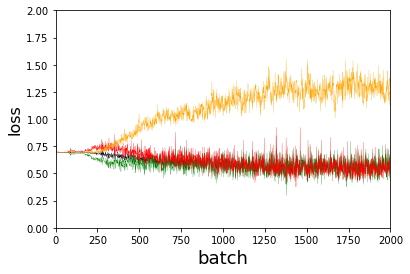

In [12]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()

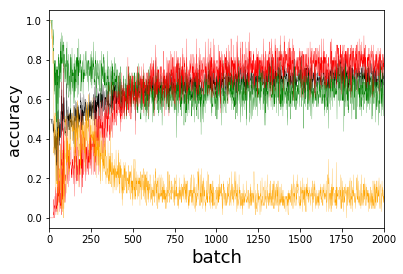

In [13]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

#### 에포크 20
![20](run/gan/0001_camel/images/sample_20.png)

#### 에포크 200
![200](run/gan/0001_camel/images/sample_200.png)

#### 에포크 400
![400](run/gan/0001_camel/images/sample_400.png)

#### 에포크 1000
![1000](run/gan/0001_camel/images/sample_1000.png)

#### 에포크 2000
![2000](run/gan/0001_camel/images/sample_2000.png)